Introduction


The dataset provided includes the abundance of Eulaema nigrita in the Brazilian Atlantic forest. It also includes a number of predictor variables including the climate (mean annual temperature and precipitation, temperature and precipitation seasonality), and land use (proportional forest cover and land use heterogeneity defined as the Shannon diversity of local land-use classes).

The climate data from Worldclim dataset are much used in eco studies. The mean annual temp is given in degrees C, the annual precip in mm, the temp seasonality (Tseason) as 100 times the SD of the monthly temp, and the precip seasonality (Pseason) as the CV of monthly precipitation (percent (ie times 100)). 

Why is the temp seasonality measured as a SD and the precipitation as a CV?

temperature varies around a mean and SD captures the absolute variation - this will tell us how much temperatures vary from the annual mean

precipitation is measured with the coefficient of variation (SD/mean) because precipitation varies a LOT depending on the location - using just SD would skew data for wetter areas. CV standardizes by the mean giving a relative variation 

the effort variable in the log number of hours of sampling and the method variable indicates whether the collecting was done with hand nets, traps, or a combo of both


In [41]:
install.packages("tidyverse") #installed to parse through the df neatly
install.packages(c("gt", "webshot2"))  #installed to make tables to then export
install.packages("car") # to calc VIF
install.packages("MASS") # fitting glm.nb
install.packages("ggeffects") # ggpredict 

trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/tidyverse_2.0.0.tgz'
Content type 'application/x-gzip' length 428817 bytes (418 KB)
downloaded 418 KB




The downloaded binary packages are in
	/var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//Rtmp9TSCFK/downloaded_packages


trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/gt_1.1.0.tgz'
trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/webshot2_0.1.2.tgz'



The downloaded binary packages are in
	/var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//Rtmp9TSCFK/downloaded_packages


trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/car_3.1-3.tgz'
Content type 'application/x-gzip' length 1541957 bytes (1.5 MB)
downloaded 1.5 MB




The downloaded binary packages are in
	/var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//Rtmp9TSCFK/downloaded_packages


trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/MASS_7.3-65.tgz'
Content type 'application/x-gzip' length 1171064 bytes (1.1 MB)
downloaded 1.1 MB




The downloaded binary packages are in
	/var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//Rtmp9TSCFK/downloaded_packages


trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-x86_64/contrib/4.5/ggeffects_2.3.1.tgz'
Content type 'application/x-gzip' length 854996 bytes (834 KB)
downloaded 834 KB




The downloaded binary packages are in
	/var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//Rtmp9TSCFK/downloaded_packages


In [42]:
library(ggplot2) #load in ggplot2 library for plotting
library(tibble) #load in to convert df to tibbles for tidyverse compatability
library(dplyr) #load in to neatly group data by column in the tibble
library(broom) #load in the convert linear model output into df
library(gt) #loaded in to create tables
library(car) # VIF
library(MASS) #glm.nb
library(ggeffects) #used in partial effects

In [43]:
# saving data
dat = read.csv("/Users/emmabolech/Desktop/BIOS15/251119/Eulaema.csv")


In [44]:
#explore the structure of the data
print(str(dat))

'data.frame':	178 obs. of  12 variables:
 $ Eulaema_nigrita: int  492 372 679 600 28 535 100 100 66 100 ...
 $ SA             : chr  "Morro_do_Itaoca" "Esta\xe7\xe3o_Ecol\xf3gica_de_Guaxindiba" "Esta\xe7\xe3o_Ecol\xf3gica_de_Guaxindiba" "Mata_do_Funil" ...
 $ SU             : chr  "1-1" "2-1" "2-2" "2-3" ...
 $ method         : chr  "NetTraps" "Traps" "Traps" "Traps" ...
 $ effort         : num  4.19 5.2 5.2 5.2 4.97 ...
 $ altitude       : int  6 17 17 30 0 43 24 24 24 24 ...
 $ MAT            : int  235 230 230 231 259 255 232 232 232 232 ...
 $ MAP            : int  1073 987 987 1030 1693 1697 1127 1127 1127 1127 ...
 $ Tseason        : int  2036 1760 1760 1820 1074 1061 2209 2209 2209 2209 ...
 $ Pseason        : int  53 49 49 51 62 63 57 57 57 57 ...
 $ forest.        : num  0.0442 0.1822 0.1822 0.0158 0.05 ...
 $ lu_het         : num  1.053 0.757 0.757 0.828 0.967 ...
NULL


In [45]:
# exploring what the data looks like
print(head(dat))

  Eulaema_nigrita
1             492
2             372
3             679
4             600
5              28
6             535
                                                              SA  SU   method
1                                                Morro_do_Itaoca 1-1 NetTraps
2                       Esta\xe7\xe3o_Ecol\xf3gica_de_Guaxindiba 2-1    Traps
3                       Esta\xe7\xe3o_Ecol\xf3gica_de_Guaxindiba 2-2    Traps
4                                                  Mata_do_Funil 2-3    Traps
5 \xc1rea_de_Prote\xe7\xe3o_Ambiental_da_Barra_do_Rio_Mamanguape 6-1      Net
6 \xc1rea_de_Prote\xe7\xe3o_Ambiental_da_Barra_do_Rio_Mamanguape 6-2      Net
    effort altitude MAT  MAP Tseason Pseason    forest.    lu_het
1 4.189655        6 235 1073    2036      53 0.04416404 1.0531299
2 5.204007       17 230  987    1760      49 0.18217054 0.7571063
3 5.204007       17 230  987    1760      49 0.18217054 0.7571063
4 5.204007       30 231 1030    1820      51 0.01577287 0.827758

In [46]:
# printing a summary or the data
print(summary(dat))

 Eulaema_nigrita        SA                 SU               method         
 Min.   :   0.00   Length:178         Length:178         Length:178        
 1st Qu.:  13.00   Class :character   Class :character   Class :character  
 Median :  38.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :  81.14                                                           
 3rd Qu.:  85.50                                                           
 Max.   :1054.00                                                           
     effort          altitude           MAT             MAP      
 Min.   : 1.609   Min.   :  -3.0   Min.   :135.0   Min.   : 623  
 1st Qu.: 2.996   1st Qu.:  68.0   1st Qu.:207.0   1st Qu.:1176  
 Median : 4.159   Median : 179.0   Median :228.0   Median :1348  
 Mean   : 4.157   Mean   : 369.3   Mean   :221.2   Mean   :1457  
 3rd Qu.: 4.718   3rd Qu.: 625.0   3rd Qu.:240.0   3rd Qu.:1634  
 Max.   :10.020   Max.   :1651.0   Max.   :263.0   Max.   :3073  
    Ts

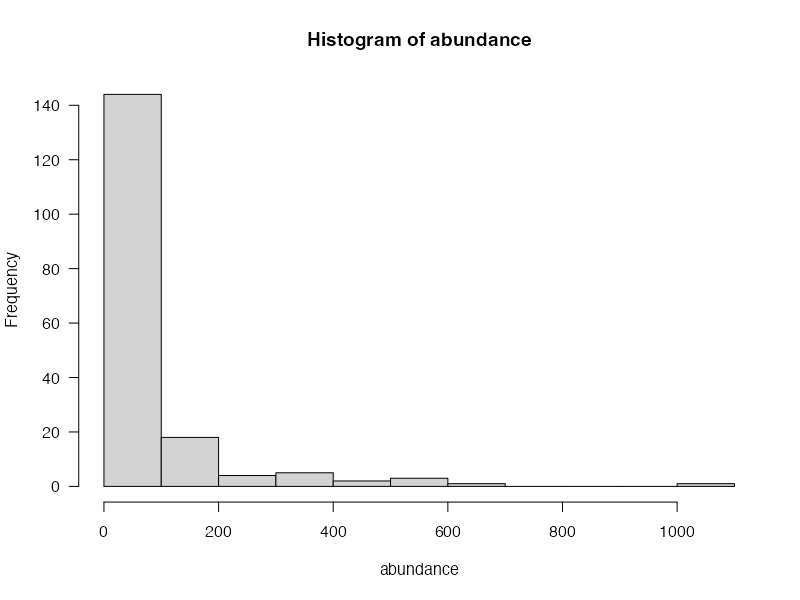

In [47]:
# look at the bee abundance with a histogram --> lots of abundance measures between 0-100 ish 

abundance = dat$Eulaema_nigrita #saves the abundance column as a variable

hist(abundance, las = 1) #plots a histogram (las just changes the axis orientation)

In [48]:
# look at variance and mean to check for overdispersion

print(var(abundance))
print(mean(abundance))

# variance is much larger than the mean so there is overdispersion


[1] 18549.07
[1] 81.14045


In [49]:
# for SA (sampling area) and SU (sampling unit) these are categorical identifies but not predictor variables

#adjust continuous predictors 

dat$altitude_std = as.numeric(scale(dat$altitude))
dat$MAT_std = as.numeric(scale(dat$MAT))
dat$MAP_std = as.numeric(scale(dat$MAP))
dat$Tseason_std = as.numeric(scale(dat$Tseason))
dat$Pseason_std = as.numeric(scale(dat$Pseason))
dat$forest_std = as.numeric(scale(dat$forest.))
dat$forest = dat$forest.
dat$lu_het_std = as.numeric(scale(dat$lu_het))
dat$effort_std = as.numeric(scale(dat$effort))

# adjust categorical predictors 

#first look at all unique entries in the method column
method_types = unique(dat$method)
print(method_types)

# this will then output effect relative to the ref category (which is NetTraps)
dat$method = factor(dat$method)

dat$method = relevel(dat$method, ref = "NetTraps")



[1] "NetTraps" "Traps"    "Net"     


In [50]:
# correlation of |0.7-0.8| == strong cor

# excluded method bc pairs is designed for continous numeric variables

predictors = c("altitude_std", "MAT_std", "MAP_std", "Tseason_std", "Pseason_std", "forest_std", "lu_het_std", "effort_std")

cor(dat[, predictors])

             altitude_std     MAT_std     MAP_std Tseason_std Pseason_std
altitude_std   1.00000000 -0.84005117  0.04188399  0.12928817  0.39131164
MAT_std       -0.84005117  1.00000000 -0.28873578 -0.51177304 -0.22524019
MAP_std        0.04188399 -0.28873578  1.00000000  0.20279084 -0.17808814
Tseason_std    0.12928817 -0.51177304  0.20279084  1.00000000  0.12151346
Pseason_std    0.39131164 -0.22524019 -0.17808814  0.12151346  1.00000000
forest_std    -0.22689647  0.09260094  0.23290059  0.06131769 -0.34163335
lu_het_std     0.05351399  0.06816874 -0.13080122 -0.19785697 -0.01689193
effort_std     0.07063983 -0.16312484 -0.03971334  0.32636326  0.17735583
              forest_std  lu_het_std  effort_std
altitude_std -0.22689647  0.05351399  0.07063983
MAT_std       0.09260094  0.06816874 -0.16312484
MAP_std       0.23290059 -0.13080122 -0.03971334
Tseason_std   0.06131769 -0.19785697  0.32636326
Pseason_std  -0.34163335 -0.01689193  0.17735583
forest_std    1.00000000 -0.34494217 -0.

In [51]:
# fitting negative binomial glm
m_std = glm.nb(Eulaema_nigrita~effort_std+altitude_std+MAT_std+MAP_std+Tseason_std+Pseason_std+forest_std+lu_het_std+method, data=dat)


In [52]:
# pseudo r^2 is around 0.48 which is ok (between 0-1) (48% of the deviance is explained by the model)
1 - (m_std$deviance/m_std$null.deviance)


In [53]:
#overdispersion looks ok with the nb glm choice 

dev <- m_std$deviance
df  <- m_std$df.residual

overdispersion <- dev / df
overdispersion

[1] 1.22249

In [54]:
# check variance inflation factor if greater than 5 there may be collinearity 
vif_values = vif(m_std)

print(vif_values)

# when including methods (this is a multi-level factor) none of them have a strong vif but due to the correlation above i will choose to throw out altitude and keep MAT

                  GVIF Df GVIF^(1/(2*Df))
effort_std    1.928996  1        1.388883
altitude_std 11.833000  1        3.439913
MAT_std      15.040236  1        3.878174
MAP_std       1.481309  1        1.217090
Tseason_std   3.397306  1        1.843178
Pseason_std   1.584412  1        1.258734
forest_std    1.478952  1        1.216122
lu_het_std    1.262162  1        1.123460
method        2.832325  2        1.297286


In [55]:
# chose to do a negative binomial bc overdispersion is so strong

# this will assume the mean as the variance 

# theta is 1.09 which is close to 1 and indicates high variance compared to mean

# using nb the SE will be larger 

# i cut altitude and chose to use standardized values so that i can more easily compare the effects
m_std_final = glm.nb(Eulaema_nigrita~effort_std+MAT_std+MAP_std+Tseason_std+Pseason_std+forest_std+lu_het_std+method, data=dat)

print(summary(m_std_final))

# Interpreting the negative binomial model: the intercept shows the log-count at (exp(intercept) = 0) (predictors are 0) to be 4.00. theta is 1.09 which shows a strong overdispersion in the data and affirms that nb is the better model to choose.



Call:
glm.nb(formula = Eulaema_nigrita ~ effort_std + MAT_std + MAP_std + 
    Tseason_std + Pseason_std + forest_std + lu_het_std + method, 
    data = dat, init.theta = 1.094103776, link = log)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.00585    0.20483  19.557  < 2e-16 ***
effort_std   0.66272    0.09729   6.812 9.63e-12 ***
MAT_std     -0.06051    0.09269  -0.653 0.513841    
MAP_std     -0.56688    0.08821  -6.427 1.30e-10 ***
Tseason_std -0.47249    0.09326  -5.067 4.05e-07 ***
Pseason_std  0.30226    0.08270   3.655 0.000257 ***
forest_std  -0.30930    0.08940  -3.460 0.000541 ***
lu_het_std  -0.05152    0.08301  -0.621 0.534805    
methodNet    0.01330    0.24366   0.055 0.956462    
methodTraps -0.33308    0.26486  -1.258 0.208536    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(1.0941) family taken to be 1)

    Null deviance: 383.67  on 177  degrees of freedom
Residual

In [56]:
# tidy model into a tibble
tidy_m = broom::tidy(m_std_final)

#generate a table that includes the exp effect
exp_table = tidy_m %>%
  as_tibble() %>%
  dplyr::rename(z.value = statistic) %>%
  mutate(exp_estimate = exp(estimate)) %>%
  dplyr::select(term, estimate, std.error, z.value, p.value, exp_estimate)


print(exp_table, width = Inf)

# A tibble: 10 × 6
   term        estimate std.error z.value  p.value exp_estimate
   <chr>          <dbl>     <dbl>   <dbl>    <dbl>        <dbl>
 1 (Intercept)   4.01      0.205  19.6    3.60e-85       54.9  
 2 effort_std    0.663     0.0973  6.81   9.63e-12        1.94 
 3 MAT_std      -0.0605    0.0927 -0.653  5.14e- 1        0.941
 4 MAP_std      -0.567     0.0882 -6.43   1.30e-10        0.567
 5 Tseason_std  -0.472     0.0933 -5.07   4.05e- 7        0.623
 6 Pseason_std   0.302     0.0827  3.65   2.57e- 4        1.35 
 7 forest_std   -0.309     0.0894 -3.46   5.41e- 4        0.734
 8 lu_het_std   -0.0515    0.0830 -0.621  5.35e- 1        0.950
 9 methodNet     0.0133    0.244   0.0546 9.56e- 1        1.01 
10 methodTraps  -0.333     0.265  -1.26   2.09e- 1        0.717


1. effort : 94% increase in bee counts with 1 SD increase in effort
2. MAT : a 6% decrease in bee counts with a 1 SD increase in MAT (however, this is insignificant)
3. MAP : a 43% decrease in bee counts with a 1 SD increase in MAP
4. Tseason : a 38% decrease in bee counts with a 1 SD increase in Tseason
5. Pseason : a 35% increase in bee counts with a 1 SD increase in Pseason 
6. forest. : a 27% decrease in bee counts with a 1 SD increase in forest cover 
7. lu_het : a 45 decrease but NOT significant
8. methodNet : a 0% change and also insignificant 
9. methodTraps :  a 29% decreases in bee counts but insignnificant
10. ** NetTraps are exluded bc they are the reference 

*** based on this I will be excluding the insignificant predictors moving forward (MAT, lu_het, and methods)

*** when i re-did with altitude included and MAT excluded --> this was effectively the same insignificant result 

In [57]:
# refitting without MAT and lu_het (due to insignificance)

m_std_refit = glm.nb(Eulaema_nigrita~effort_std+MAP_std+Tseason_std+Pseason_std+forest_std, data=dat)

print(summary(m_std_refit))




Call:
glm.nb(formula = Eulaema_nigrita ~ effort_std + MAP_std + Tseason_std + 
    Pseason_std + forest_std, data = dat, init.theta = 1.076928683, 
    link = log)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.93316    0.07364  53.409  < 2e-16 ***
effort_std   0.56720    0.07904   7.176 7.19e-13 ***
MAP_std     -0.51120    0.08066  -6.338 2.33e-10 ***
Tseason_std -0.42352    0.08168  -5.185 2.16e-07 ***
Pseason_std  0.33103    0.08000   4.138 3.51e-05 ***
forest_std  -0.27033    0.08084  -3.344 0.000826 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(1.0769) family taken to be 1)

    Null deviance: 378.07  on 177  degrees of freedom
Residual deviance: 205.26  on 172  degrees of freedom
AIC: 1775.9

Number of Fisher Scoring iterations: 1


              Theta:  1.077 
          Std. Err.:  0.111 

 2 x log-likelihood:  -1761.935 


In [58]:
# quick AIC check to make sure the reduced model is preferred

AIC_check = AIC(m_std_final, m_std_refit)

deltaAIC = AIC_check$AIC[1] - AIC_check$AIC[2]

print(deltaAIC)

# a bit higher than 2 so slightly better to drop the two insignificant factors 

[1] 4.599967


In [59]:
# rechecking VIF for collinearity, looks ok
vif(m_std_refit)

 effort_std     MAP_std Tseason_std Pseason_std  forest_std 
   1.168628    1.101761    1.196241    1.183276    1.175281 

In [60]:
# re checking pseudo R^2 
ps2_refit = 1 - (m_std_refit$deviance/m_std_refit$null.deviance)

print(ps2_refit)
# pseudo r^2 is around 0.45 which is ok (between 0-1) (45% of the deviance is explained by the model)

[1] 0.4570786


In [61]:
# rechecking overdispersion for the refit model 
dev_refit <- m_std$deviance
df_refit  <- m_std$df.residual

overdispersion_refit <- dev / df
overdispersion_refit

[1] 1.22249

In [62]:
# generating a tidy table with the exponentiated estimates
tidy_m_refit = broom::tidy(m_std_refit)

exp_table_refit_exp = tidy_m_refit %>%
  as_tibble() %>%
  dplyr::rename(z.value = statistic) %>%
  mutate(exp_estimate = exp(estimate)) %>%
  dplyr::select(term, estimate, std.error, z.value, p.value, exp_estimate)


print(exp_table_refit_exp, width = Inf)

# A tibble: 6 × 6
  term        estimate std.error z.value  p.value exp_estimate
  <chr>          <dbl>     <dbl>   <dbl>    <dbl>        <dbl>
1 (Intercept)    3.93     0.0736   53.4  0              51.1  
2 effort_std     0.567    0.0790    7.18 7.19e-13        1.76 
3 MAP_std       -0.511    0.0807   -6.34 2.33e-10        0.600
4 Tseason_std   -0.424    0.0817   -5.19 2.16e- 7        0.655
5 Pseason_std    0.331    0.0800    4.14 3.51e- 5        1.39 
6 forest_std    -0.270    0.0808   -3.34 8.26e- 4        0.763


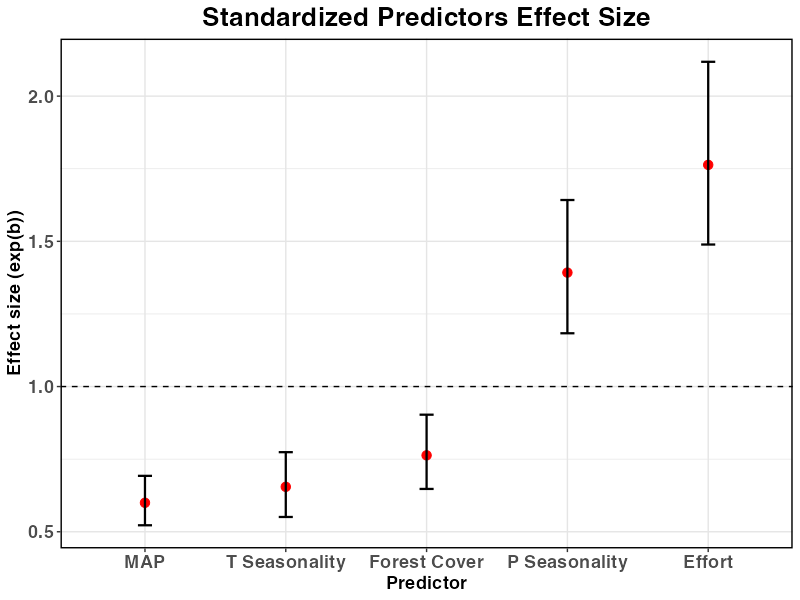

In [63]:
# showing exponentiated values as a forest plot that is ordered 

tidy_m_refit <- broom::tidy(m_std_refit, conf.int = TRUE) #adding conf intervals 

# Build the table
exp_table_refit <- tidy_m_refit %>%
  filter(term != "(Intercept)") %>%              # remove intercept
  mutate(
    z.value = statistic,
    exp_estimate = exp(estimate),
    exp_conf.low = exp(conf.low), # adding confidence innterval error bars
    exp_conf.high = exp(conf.high),
    term = dplyr::recode(term, # renaming 
      "effort_std"   = "Effort",
      "MAP_std"      = "MAP",
      "Tseason_std"  = "T Seasonality",
      "Pseason_std"  = "P Seasonality",
      "forest_std"   = "Forest Cover"
    )
  )

# Forest plot
ggplot(exp_table_refit, aes(
    x = reorder(term, exp_estimate), # reordering based on the ordered exp_estimate numbers
    y = exp_estimate)
) +
  geom_point(size = 3, color = "red") +
  geom_errorbar(aes(ymin = exp_conf.low, ymax = exp_conf.high),
                width = 0.1, linewidth = 0.8) +
  geom_hline(yintercept = 1, linetype = "dashed") + # adding the line that denoted insignnificance (exp(0))
  labs(
    x = "Predictor",
    y = "Effect size (exp(b))",
    title = "Standardized Predictors Effect Size"
  ) +
  theme(
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_line(color = "grey90"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 14, face = "bold"), 
    axis.title.y = element_text(size = 14, face = "bold"), 
    axis.text.x = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold")) 


In [64]:
# ggpredict inncludes SE and 95% CI (and reverts to response scale)

effort_predict = ggpredict(m_std_refit, terms = "effort_std")

MAP_predict = ggpredict(m_std_refit, terms = "MAP_std")

Tseason_predict = ggpredict(m_std_refit, terms = "Tseason_std")

Pseason_predict = ggpredict(m_std_refit, terms = "Pseason_std")

forest_predict = ggpredict(m_std_refit, terms = "forest_std")

#plotting all 
effort_plot = ggplot(effort_predict, aes(x = x, y = predicted)) +
  geom_ribbon(aes(ymin = conf.low, ymax = conf.high), fill = "skyblue") + #this adds the confience interval ribbon around the model line
  geom_line(color = "black", linewidth = 1.5) + # model prediction
  geom_point(data = dat, aes(x = effort_std, y = abundance), color = "gray") + # adding raw data
  labs(
    x = "Standardized Effort",
    y = "Predicted Abundance", 
    title = "Partial Effect of Effort on Bee Abundance"
  ) +
  theme(
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_line(color = "grey90"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 14, face = "bold"), 
    axis.title.y = element_text(size = 14, face = "bold"), 
    axis.text.x = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold")) 

# repeat the same for all predictors 
MAP_plot = ggplot(MAP_predict, aes(x = x, y = predicted)) +
  geom_ribbon(aes(ymin = conf.low, ymax = conf.high), fill = "skyblue") +
  geom_line(color = "black", linewidth = 1.5) + # model prediction
  geom_point(data = dat, aes(x = effort_std, y = abundance), color = "gray") + # adding raw data
  labs(
    x = "Standardized MAP",
    y = "Predicted Abundance", 
    title = "Partial Effect of MAP on Bee Abundance"
  ) +
  theme(
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_line(color = "grey90"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 14, face = "bold"), 
    axis.title.y = element_text(size = 14, face = "bold"), 
    axis.text.x = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold"))

Tseason_plot = ggplot(Tseason_predict, aes(x = x, y = predicted)) +
  geom_ribbon(aes(ymin = conf.low, ymax = conf.high), fill = "skyblue") +
  geom_line(color = "black", linewidth = 1.5) + # model prediction
  geom_point(data = dat, aes(x = effort_std, y = abundance), color = "gray") + # adding raw data
  labs(
    x = "Standardized Tseason",
    y = "Predicted Abundance", 
    title = "Partial Effect of Temperature Seasonality on Bee Abundance"
  ) +
  theme(
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_line(color = "grey90"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 14, face = "bold"), 
    axis.title.y = element_text(size = 14, face = "bold"), 
    axis.text.x = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold"))

Pseason_plot = ggplot(Pseason_predict, aes(x = x, y = predicted)) +
  geom_ribbon(aes(ymin = conf.low, ymax = conf.high), fill = "skyblue") +
  geom_line(color = "black", linewidth = 1.5) + # model prediction
  geom_point(data = dat, aes(x = effort_std, y = abundance), color = "gray") + # adding raw data
  labs(
    x = "Standardized Pseason",
    y = "Predicted Abundance", 
    title = "Partial Effect of Precipication Seasonality on Bee Abundance"
  ) +
  theme(
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_line(color = "grey90"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 14, face = "bold"), 
    axis.title.y = element_text(size = 14, face = "bold"), 
    axis.text.x = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold"))

forest_plot = ggplot(forest_predict, aes(x = x, y = predicted)) +
  geom_ribbon(aes(ymin = conf.low, ymax = conf.high), fill = "skyblue") +
  geom_line(color = "black", linewidth = 1.5) + # model prediction
  geom_point(data = dat, aes(x = effort_std, y = abundance), color = "gray") + # adding raw data
  labs(
    x = "Standardized Forest Cover",
    y = "Predicted Abundance", 
    title = "Partial Effect of Forest Cover on Bee Abundance"
  ) +
  theme(
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_line(color = "grey90"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 14, face = "bold"), 
    axis.title.y = element_text(size = 14, face = "bold"), 
    axis.text.x = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold"))


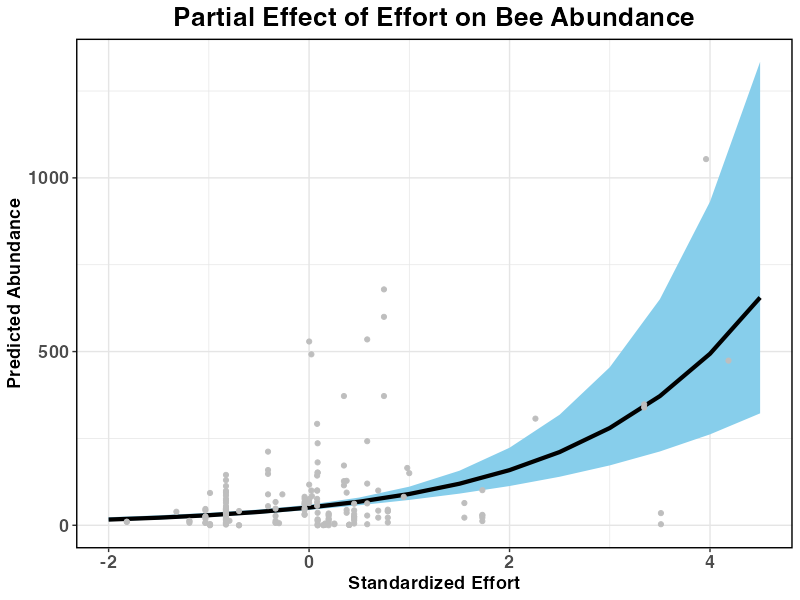

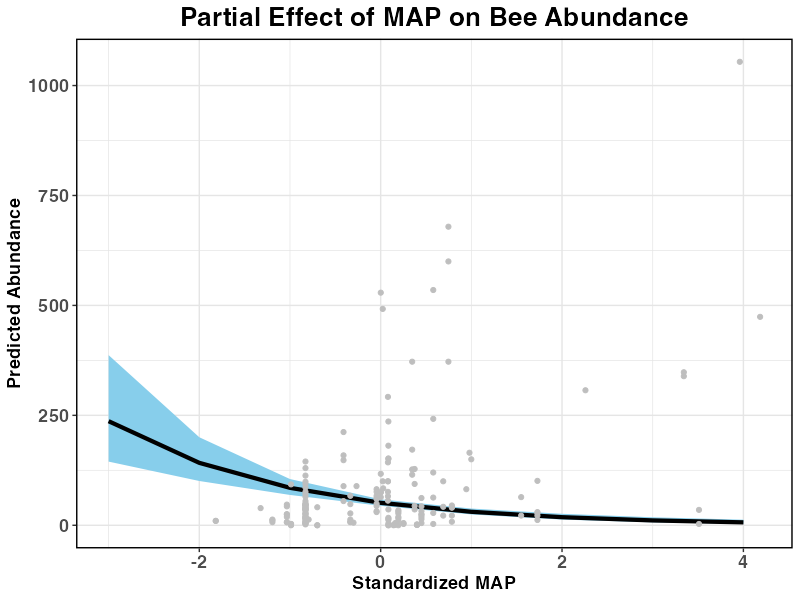

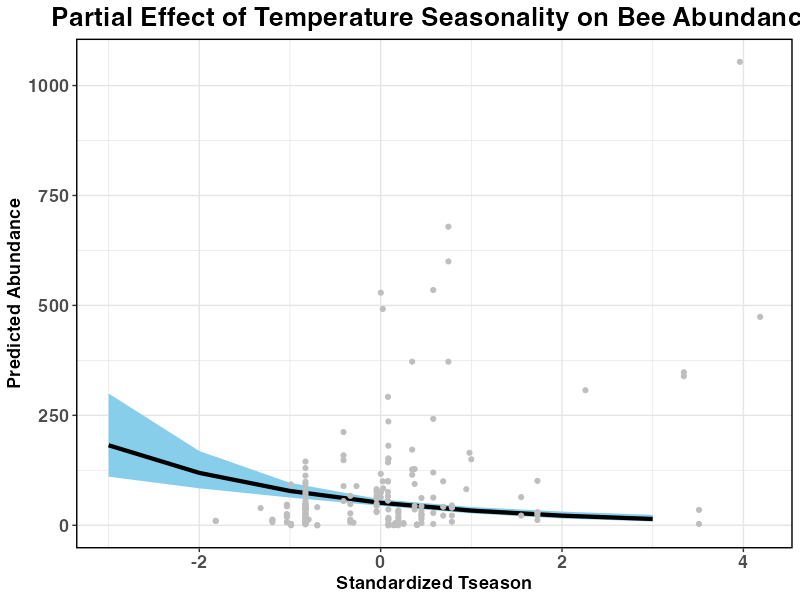

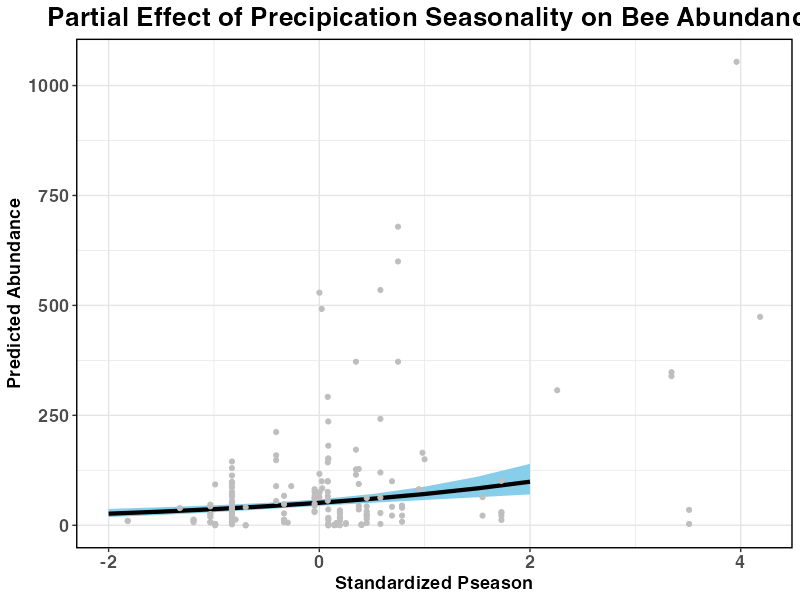

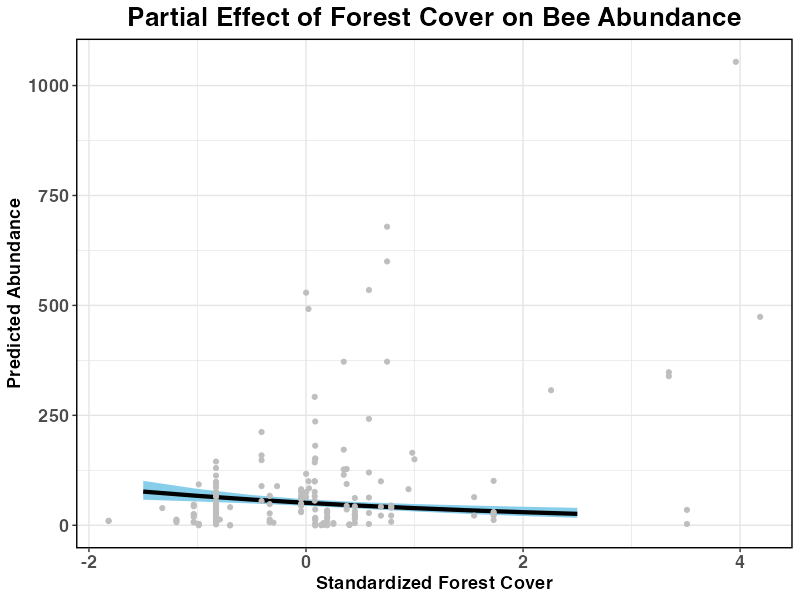

In [65]:
# creating the plotted panel 

effort_plot 
MAP_plot 
Tseason_plot 
Pseason_plot 
forest_plot

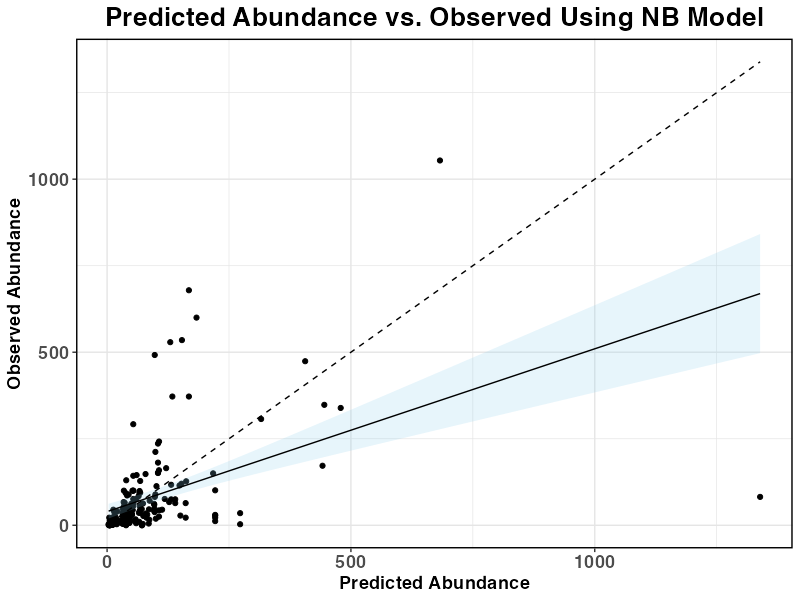

In [66]:
# all predicted values for entire model against observed

predicted_values = predict(m_std_refit, type = "response")
dat$predicted_values = predicted_values
dat$observed = abundance

# model fit line with a confidence interval shadding
fit_line <- lm(observed ~ predicted_values, data = dat)
pred_fit_line <- data.frame(
  predicted_values = seq(min(dat$predicted_values), max(dat$predicted_values), length.out = 100)
)
pred_fit_line$fit <- predict(fit_line, newdata = pred_fit_line, interval = "confidence")[, "fit"]
pred_fit_line$lwr <- predict(fit_line, newdata = pred_fit_line, interval = "confidence")[, "lwr"]
pred_fit_line$upr <- predict(fit_line, newdata = pred_fit_line, interval = "confidence")[, "upr"]

# perfect prediction line 1:1
perfect_df <- data.frame(
  x = seq(min(dat$predicted_values), max(dat$predicted_values), length.out = 100),
  y = seq(min(dat$predicted_values), max(dat$predicted_values), length.out = 100),
  line_type = "Perfect predictions"
)

# plotting 
ggplot() +
  geom_point(
    data = dat, 
    aes(x = predicted_values, y = observed)
  ) +
  geom_ribbon(
    data = pred_fit_line, 
    aes(x = predicted_values, ymin = lwr, ymax = upr),
    fill = "skyblue",
    alpha = 0.2, 
    inherit.aes = FALSE
  ) + 
  geom_line(
     data = pred_fit_line, 
     aes(x = predicted_values, y = fit), 
     color = "black"
  ) +
  geom_line(
    data = perfect_df, 
    aes(x = x, y = y), 
    linetype = "dashed"
  ) +
  labs(
    x = "Predicted Abundance",
    y = "Observed Abundance", 
    title = "Predicted Abundance vs. Observed Using NB Model",
  ) +
  theme(
    panel.background = element_rect(fill = "white"),
    panel.grid.major = element_line(color = "grey90"),
    panel.grid.minor = element_line(color = "grey90"),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 14, face = "bold"), 
    axis.title.y = element_text(size = 14, face = "bold"), 
    axis.text.x = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 14, face = "bold"))



In [67]:
# outputting the summary tables 

all_predictor_table = exp_table %>%   
    #change the axis labels to be a bit clearer for the reader
    #mutate(term = recode(term,
      #"(Intercept)" = "BarbareaM:BarbareaL",
      
    #open a gt table
    gt() %>%
    tab_header(title = "NB GLM for All Predictors") %>%
    #change decimal output of the following
    fmt_number(
      columns = c(estimate, std.error, z.value, p.value, exp_estimate), 
      decimals = 3) %>%
    #make p value scientific 
    fmt_scientific(
      columns = c(p.value),
      decimals = 2) %>%
    cols_label(
      term = "",
      estimate = "Estimate",
      std.error = "SE",
      z.value = "z-value",
      p.value = "p-Value",
      exp_estimate = "Exp Estimate"
    )


gtsave(all_predictor_table, "all_predictor_table.png", zoom = 4)

file:////var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//Rtmp9TSCFK/file18444a9f271f.html screenshot completed


In [68]:
# outputting the summary tables 

refit_predictor_table = exp_table_refit_exp %>%   
    #change the axis labels to be a bit clearer for the reader
    #mutate(term = recode(term,
      #"(Intercept)" = "BarbareaM:BarbareaL",
      
    #open a gt table
    gt() %>%
    tab_header(title = "NB GLM for Significant Predictors") %>%
    #change decimal output of the following
    fmt_number(
      columns = c(estimate, std.error, z.value, p.value, exp_estimate), 
      decimals = 3) %>%
    #make p value scientific 
    fmt_scientific(
      columns = c(p.value),
      decimals = 2) %>%
    cols_label(
      term = "",
      estimate = "Estimate",
      std.error = "SE",
      z.value = "z-value",
      p.value = "p-Value",
      exp_estimate = "Exp Estimate"
    )


gtsave(refit_predictor_table, "refit_predictor_table.png", zoom = 4)

file:////var/folders/dc/cq8t0dr57nv1yxtfmm9dg18m0000gn/T//Rtmp9TSCFK/file184416c18a7f.html screenshot completed
